<a href="https://colab.research.google.com/github/Anirudh-Jain/AI/blob/master/Shock_Front_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Shock Front Classification**

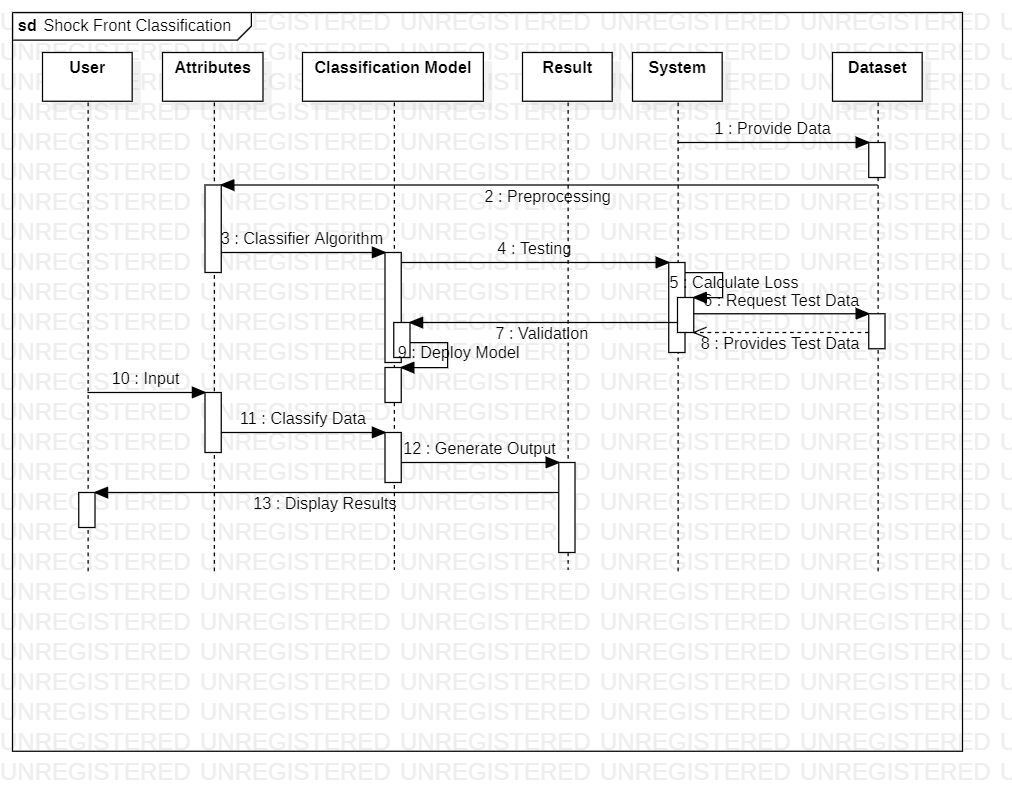

## Generating Data

In [417]:
import pandas as pd
import uuid
import numpy as np
import random

In [418]:
num_values = 500

# A list of 8 features
features = [
    "id",
    "pressure",
    "temperature",
    "density",
    "shock angle",
    "wedge angle",
    "velocity",
    "mach",
]

In [419]:
# Creating a DF for these features
df = pd.DataFrame(columns=features)

In [420]:
df['id'] = [uuid.uuid4().hex for i in range(num_values)]
df['id'].nunique()==num_values
df['id'].head(10)

0    8b40d5e154214caa94cec48649246a18
1    062c7a3c1ae040a1a66ee0bfd1b4b714
2    21aeeeda14e44c64aa0afca5fc0ff48a
3    b0dd50a4b80f4b5abe0832df3956fb03
4    443ccdae0d0942729b59eb1601d42782
5    a867e67a3173419eab7a0e1dc90227d6
6    2b5fe12faa854d8684b1f0c8ee5953bc
7    0cc074394dea4f4ea7ca40c4bd8c3d0b
8    2e7b57677d214421b854c62eee4e5deb
9    cdd347f0d06d49f4b2d3505e9ea3f69b
Name: id, dtype: object

In [421]:
p = [random.randrange(10,100) for i in range(500)]
df['pressure'] = [x/10 for x in p] # Pressure taken in MPa
df['pressure'].head(10)

0    8.2
1    9.7
2    5.5
3    6.6
4    2.2
5    4.2
6    2.8
7    3.7
8    8.2
9    9.7
Name: pressure, dtype: float64

In [422]:
t = [random.randrange(1000,10000) for i in range(500)]
df['temperature'] = [x/10 for x in t] # Temperature taken in K
df['temperature'].head(10)

0    765.9
1    409.8
2    781.6
3    852.7
4    792.4
5    804.3
6    787.5
7    924.0
8    850.7
9    861.5
Name: temperature, dtype: float64

In [423]:
d = [random.randrange(1,100) for i in range(500)]
df['density'] = [x/10 for x in d] # Density taken in kg/m3
df['density'].head(10)

0    0.6
1    5.3
2    8.3
3    6.9
4    7.6
5    3.1
6    6.2
7    9.9
8    2.9
9    5.8
Name: density, dtype: float64

In [424]:
sa = [random.randrange(0,180) for i in range(500)]
df['shock angle'] = [x/10 for x in sa] # Shock angle in degrees
df['shock angle'].head(10)

0    14.6
1    11.7
2     9.0
3    13.8
4     2.5
5     8.1
6     5.0
7    17.1
8     6.2
9    14.5
Name: shock angle, dtype: float64

In [425]:
wa = [random.randrange(0,180) for i in range(500)]
df['wedge angle'] = [x/10 for x in wa] # Wedge angle in degrees
df['wedge angle'].head(10)

0    10.3
1    16.4
2     6.6
3    10.0
4    10.2
5    17.5
6     1.3
7     2.3
8     9.9
9     5.8
Name: wedge angle, dtype: float64

In [426]:
v = [random.randrange(332,7000) for i in range(500)]
df['velocity'] = [x/10 for x in v] # Velocity in m/s
df['velocity'].head(10)

0    451.6
1    634.4
2    301.0
3     50.7
4    140.8
5     94.3
6    377.5
7    227.8
8    280.0
9    622.7
Name: velocity, dtype: float64

In [427]:
df['mach'] = df['velocity']/331.29 # Mach no. ratio of speed of shockwave to the speed of sound in the medium i.e. air
df['mach'].head(10)

0    1.363156
1    1.914939
2    0.908570
3    0.153038
4    0.425005
5    0.284645
6    1.139485
7    0.687615
8    0.845181
9    1.879622
Name: mach, dtype: float64

###Clustering to get Target Data i.e. types of Shock Waves

In [428]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           500 non-null    object 
 1   pressure     500 non-null    float64
 2   temperature  500 non-null    float64
 3   density      500 non-null    float64
 4   shock angle  500 non-null    float64
 5   wedge angle  500 non-null    float64
 6   velocity     500 non-null    float64
 7   mach         500 non-null    float64
dtypes: float64(7), object(1)
memory usage: 31.4+ KB


In [429]:
from sklearn.cluster import KMeans

In [430]:
kmeans = KMeans(n_clusters=3, random_state=48)
kmeans.fit(df.drop(['id'], axis = 1))

KMeans(n_clusters=3, random_state=48)

In [431]:
df['type'] = kmeans.labels_

In [432]:
dictionary = {0:'oblique shock wave',
              1:'reflected oblique or bow shock waves',
              2: 'impinging normal shock wave'}

In [433]:
df['type'].replace(dictionary, inplace = True)

In [434]:
df.head()

id  pressure  temperature  density  \
0  8b40d5e154214caa94cec48649246a18       8.2        765.9      0.6   
1  062c7a3c1ae040a1a66ee0bfd1b4b714       9.7        409.8      5.3   
2  21aeeeda14e44c64aa0afca5fc0ff48a       5.5        781.6      8.3   
3  b0dd50a4b80f4b5abe0832df3956fb03       6.6        852.7      6.9   
4  443ccdae0d0942729b59eb1601d42782       2.2        792.4      7.6   

   shock angle  wedge angle  velocity      mach  \
0         14.6         10.3     451.6  1.363156   
1         11.7         16.4     634.4  1.914939   
2          9.0          6.6     301.0  0.908570   
3         13.8         10.0      50.7  0.153038   
4          2.5         10.2     140.8  0.425005   

                                   type  
0                    oblique shock wave  
1  reflected oblique or bow shock waves  
2                    oblique shock wave  
3                    oblique shock wave  
4                    oblique shock wave

Saving in .csv format

In [435]:
df.to_csv('shock_front_data.csv')

## Data Visualization

In [436]:
df.describe()

pressure  temperature     density  shock angle  wedge angle  \
count  500.000000   500.000000  500.000000   500.000000    500.00000   
mean     5.582400   558.796600    5.034000     8.876600      9.27240   
std      2.628351   262.039108    2.776137     5.206554      5.09244   
min      1.000000   101.700000    0.100000     0.000000      0.00000   
25%      3.200000   332.750000    2.800000     4.200000      5.10000   
50%      5.650000   566.900000    5.150000     9.050000      9.80000   
75%      8.025000   787.600000    7.325000    13.225000     13.52500   
max      9.900000   999.700000    9.900000    17.900000     17.90000   

         velocity        mach  
count  500.000000  500.000000  
mean   363.768800    1.098037  
std    193.440168    0.583900  
min     33.700000    0.101724  
25%    199.175000    0.601210  
50%    363.200000    1.096320  
75%    533.175000    1.609391  
max    697.600000    2.105708

In [437]:
df.isna().sum()

id             0
pressure       0
temperature    0
density        0
shock angle    0
wedge angle    0
velocity       0
mach           0
type           0
dtype: int64

In [438]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


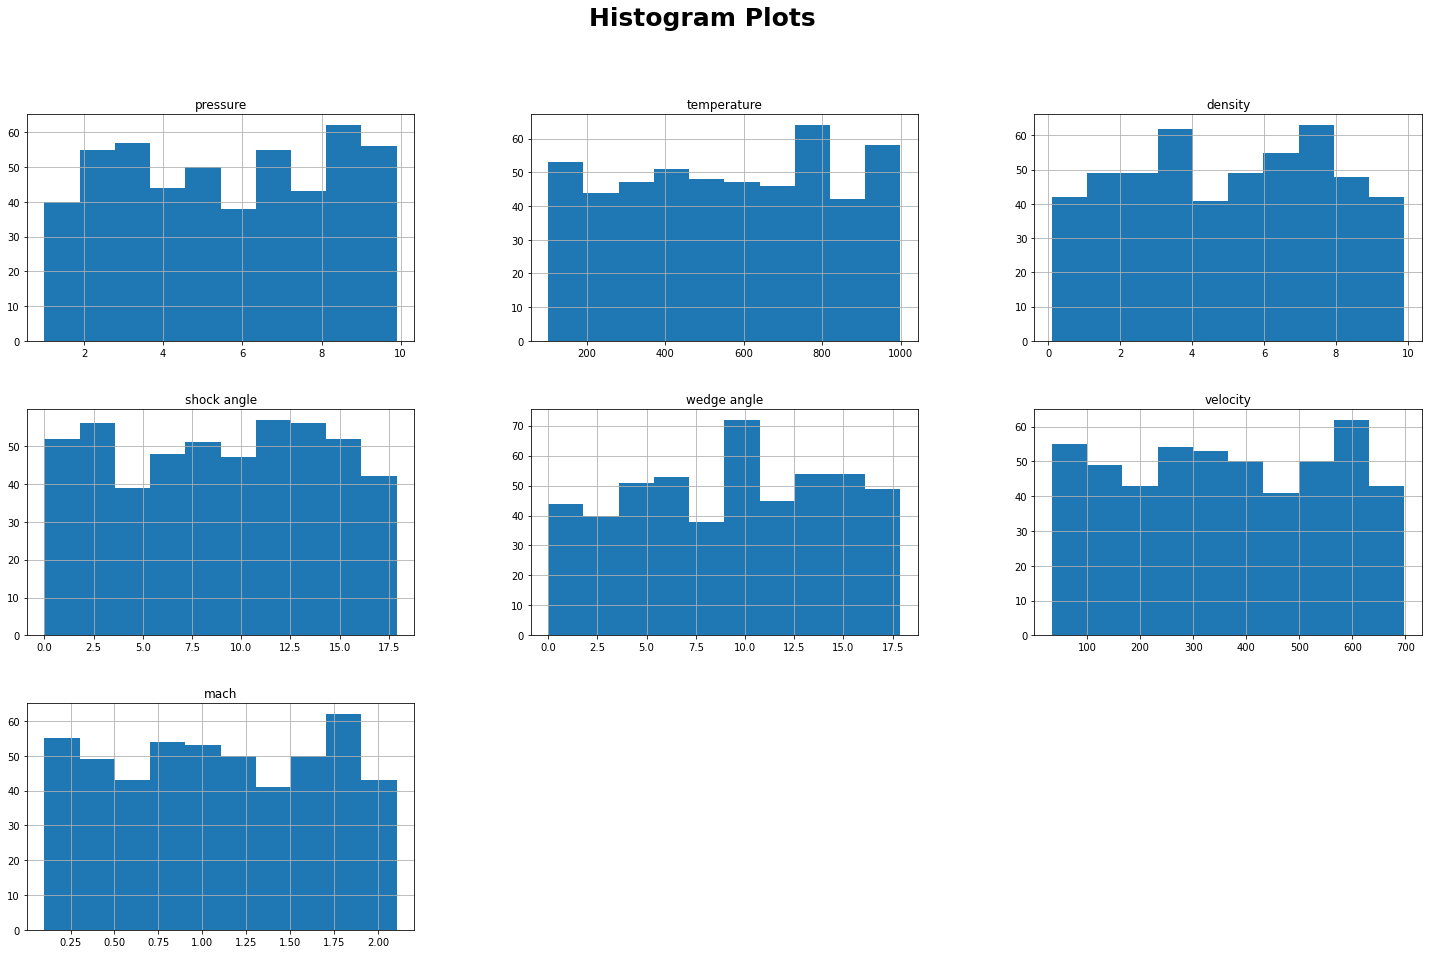

In [439]:
fig = plt.figure(figsize=(25, 15))
ax = fig.gca()
df.hist(ax=ax)
fig.suptitle('Histogram Plots', fontsize=25, fontweight ="bold")
fig.show()

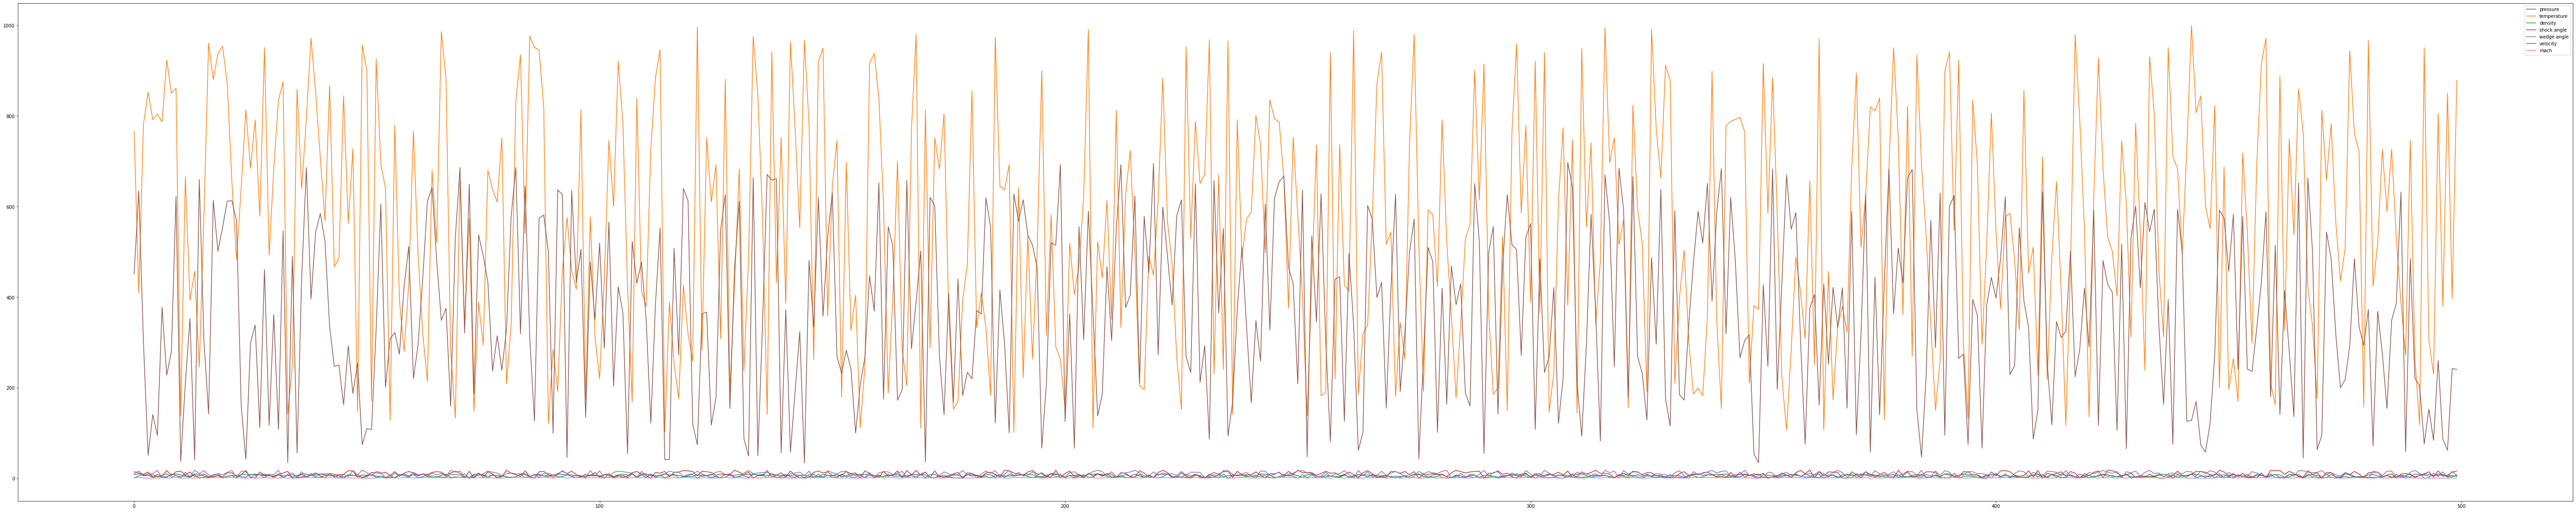

In [440]:
fig = plt.figure(figsize=(100,20))
ax = fig.gca()
df.plot(ax=ax)
plt.show()

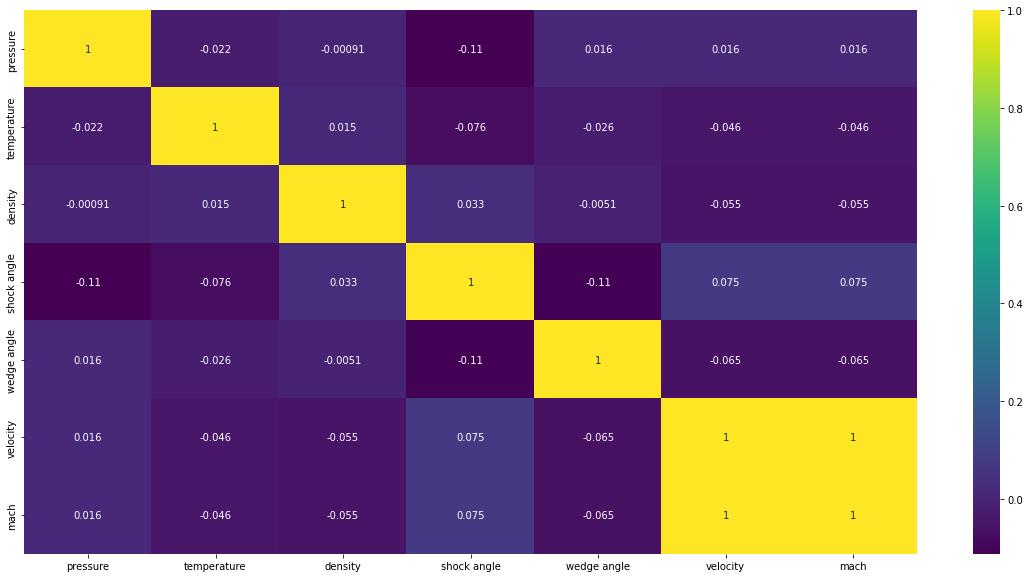

In [441]:
df_heatmap = df.copy()
plt.figure(figsize=(20,10))
sns.heatmap(df_heatmap.corr(),cmap='viridis',annot=True)

## Preprocessing

Cube-root Transformation

In [442]:
df['temperature'] = np.cbrt(df['temperature'])

Square-root Transformation

In [443]:
df['velocity'] = np.cbrt(df['velocity'])

Normalization

In [444]:
from sklearn.preprocessing import MinMaxScaler
mmx = MinMaxScaler(feature_range=(0, 10))

In [445]:
df.drop('id', axis = 1, inplace = True)

Label-Encoding Data

In [446]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['type'] = le.fit_transform(df['type'])

After Preprocessing

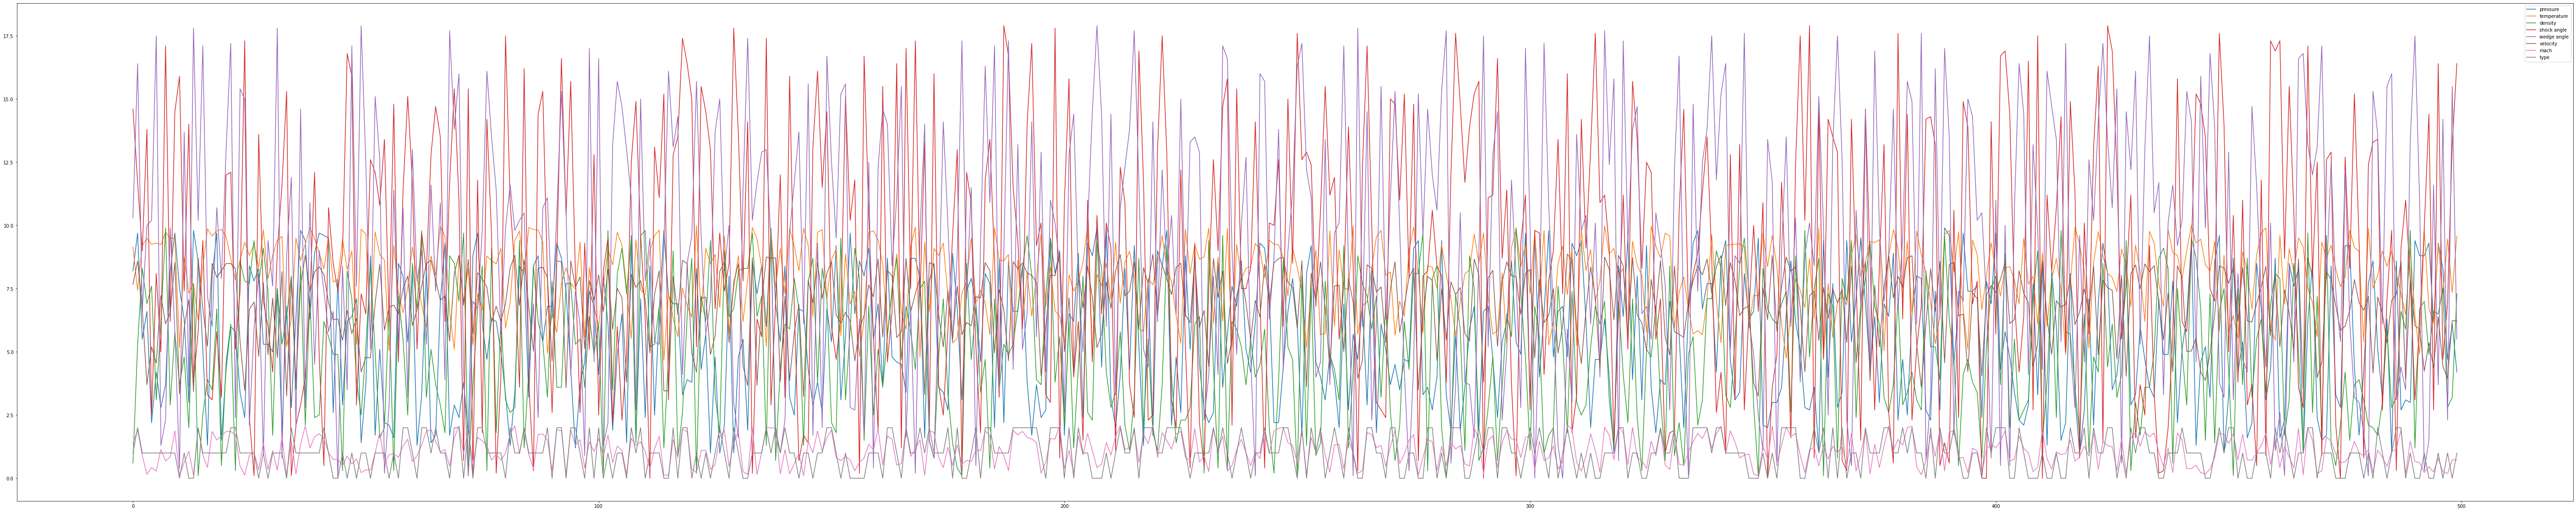

In [447]:
fig = plt.figure(figsize=(100,20))
ax = fig.gca()
df.plot(ax=ax)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


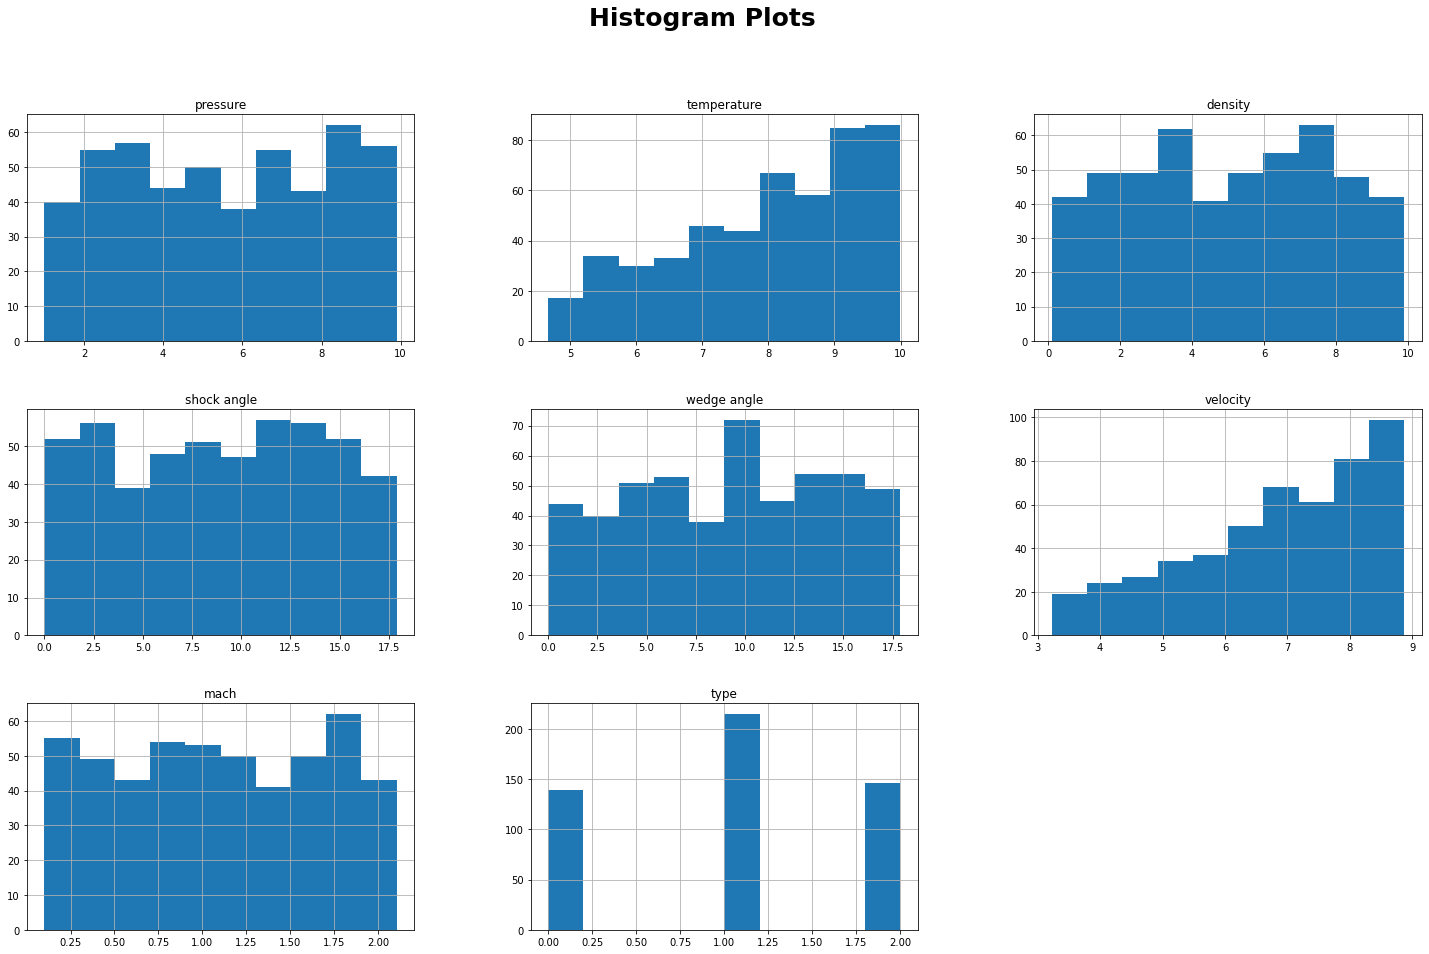

In [448]:
fig = plt.figure(figsize=(25, 15))
ax = fig.gca()
df.hist(ax=ax)
fig.suptitle('Histogram Plots', fontsize=25, fontweight ="bold")
fig.show()

## Splitting Data into Train and Test

In [449]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [450]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=71)

## ***Classification***

In [451]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

### K-Nearest Neighbour

In [452]:
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [453]:
y_pred_knn = knn.predict(X_test)
y_pred_knn

array([0, 0, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2, 0, 0, 1, 0, 1, 1, 1,
       0, 2, 1, 1, 1, 2, 1, 0, 0, 2, 1, 1, 0, 0, 2, 2, 0, 0, 0, 1, 0, 1,
       2, 2, 1, 0, 1, 1, 2, 1, 1, 2, 0, 0, 2, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 2, 2, 0, 2, 1, 1, 2, 1, 1, 2, 2, 0, 0, 1, 2, 0,
       1, 1, 0, 1, 2, 2, 2, 1, 0, 1, 0, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 2, 2, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 2, 1, 2])

Metrics

In [454]:
print(
    f"Classification report for KNN - Classifier {knn}:\n"
    f"{classification_report(y_test, y_pred_knn)}\n"
)

Classification report for KNN - Classifier KNeighborsClassifier():
              precision    recall  f1-score   support

           0       0.69      0.60      0.64        48
           1       0.63      0.78      0.70        60
           2       0.79      0.62      0.69        42

    accuracy                           0.68       150
   macro avg       0.70      0.67      0.68       150
weighted avg       0.69      0.68      0.68       150




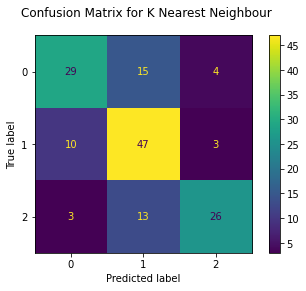

In [455]:
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_knn)
disp.figure_.suptitle("Confusion Matrix for K Nearest Neighbour")
plt.show()

### Naïve Bayes Classifier

In [456]:
nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB()

In [457]:
y_pred_nb = nb.predict(X_test)
y_pred_nb

array([1, 0, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 0, 1, 0, 1, 0, 2, 1, 1, 1, 2,
       1, 0, 2, 1, 2, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 2, 2, 1, 1, 0, 1, 1, 0, 2, 0, 1, 0, 0, 2, 0, 0, 0, 0, 1, 0, 1,
       1, 2, 1, 0, 0, 2, 2, 2, 1, 0, 2, 2, 2, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 2, 2, 0, 2, 1, 2, 2, 1, 1, 2, 2, 2, 0, 2, 2, 0,
       1, 1, 0, 0, 0, 2, 2, 1, 0, 0, 0, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1,
       1, 2, 2, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 2, 2, 1, 2])

Metrics

In [458]:
print(
    f"Classification report for Naïve Bayes {nb}:\n"
    f"{classification_report(y_test, y_pred_nb)}\n"
)

Classification report for Naïve Bayes GaussianNB():
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        48
           1       0.98      0.88      0.93        60
           2       0.91      0.95      0.93        42

    accuracy                           0.94       150
   macro avg       0.94      0.95      0.94       150
weighted avg       0.94      0.94      0.94       150




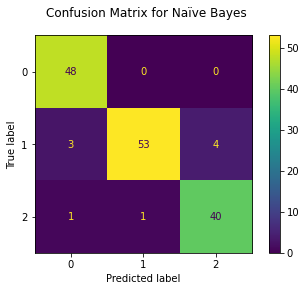

In [459]:
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_nb)
disp.figure_.suptitle("Confusion Matrix for Naïve Bayes")
plt.show()

### Random-Forest Classifier

In [460]:
rf = RandomForestClassifier(criterion = 'entropy')
rf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy')

In [461]:
y_pred_rf = rf.predict(X_test)
y_pred_rf

array([1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 0, 1, 0, 1, 0, 2, 1, 1, 1, 2,
       1, 0, 2, 1, 2, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 2, 2, 1, 1, 0, 1, 1, 0, 2, 0, 1, 0, 0, 2, 0, 0, 0, 0, 1, 0, 1,
       1, 2, 1, 0, 0, 1, 2, 2, 1, 0, 2, 2, 2, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 2, 2, 0, 2, 1, 2, 2, 1, 1, 2, 2, 2, 0, 2, 2, 0,
       1, 1, 0, 0, 0, 2, 2, 1, 0, 0, 0, 2, 1, 2, 2, 1, 1, 2, 1, 2, 2, 1,
       1, 2, 2, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 2, 2, 1, 2])

In [462]:
print(
    f"Classification report for Random Forest Classifier {rf}:\n"
    f"{classification_report(y_test, y_pred_rf)}\n"
)

Classification report for Random Forest Classifier RandomForestClassifier(criterion='entropy'):
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        48
           1       0.98      0.97      0.97        60
           2       1.00      0.95      0.98        42

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150




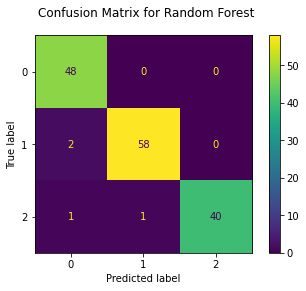

In [463]:
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf)
disp.figure_.suptitle("Confusion Matrix for Random Forest")
plt.show()